In [1]:
from models.embedder_with_classification_head import EmbedderClassifier
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface
from models.embedder_with_classification_head.embedders import (
    SentenceTransformerEmbedder,
)
from models.embedder_with_classification_head.classification_heads import (
    NeuralNetClassifier,
    GenericSklearnCalssifier,
)

from datetime import datetime
from matplotlib.colors import ListedColormap

from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, Matern
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime


In [ ]:
config = {
    "solver": "adam",
    "random_state": 42,
    "max_iter": 500,
    "learning_rate_init": 0.0001,
    "hidden_layer_sizes": (64, 32),
    "early_stopping": False,
    "alpha": 0.01,
    "activation": "relu",
}


dataloader = AnnotationDataLoader()


embedder = SentenceTransformerEmbedder(r"pritamdeka/S-BioBert-snli-multinli-stsb")
classifier = GenericSklearnCalssifier(MLPClassifier, model_kwargs=config)
embedder_m = EmbedderClassifier(embedder, classifier)
embedder_m.train(dataloader.get_train(resample=True, class_ratio={0: 0.5, 1: 0.5, 2: 1}))


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

c:\Users\Elon\anaconda3\envs\main\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Elon\.cache\huggingface\hub\models--pritamdeka--S-BioBert-snli-multinli-stsb. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Original Training Class Distribution: Counter({2: 3060, 0: 1530, 1: 1530})


AssertionError: Model must be of a ModelEvalInfoInterface

In [3]:

embedder_m.model_info = str(config)
embedder_m.model_title = "Pretrained embedder"

In [4]:
m = ModelEvaluator(embedder_m, dataloader.get_validation())
c_report = m.generate_report(include_probablities=True)


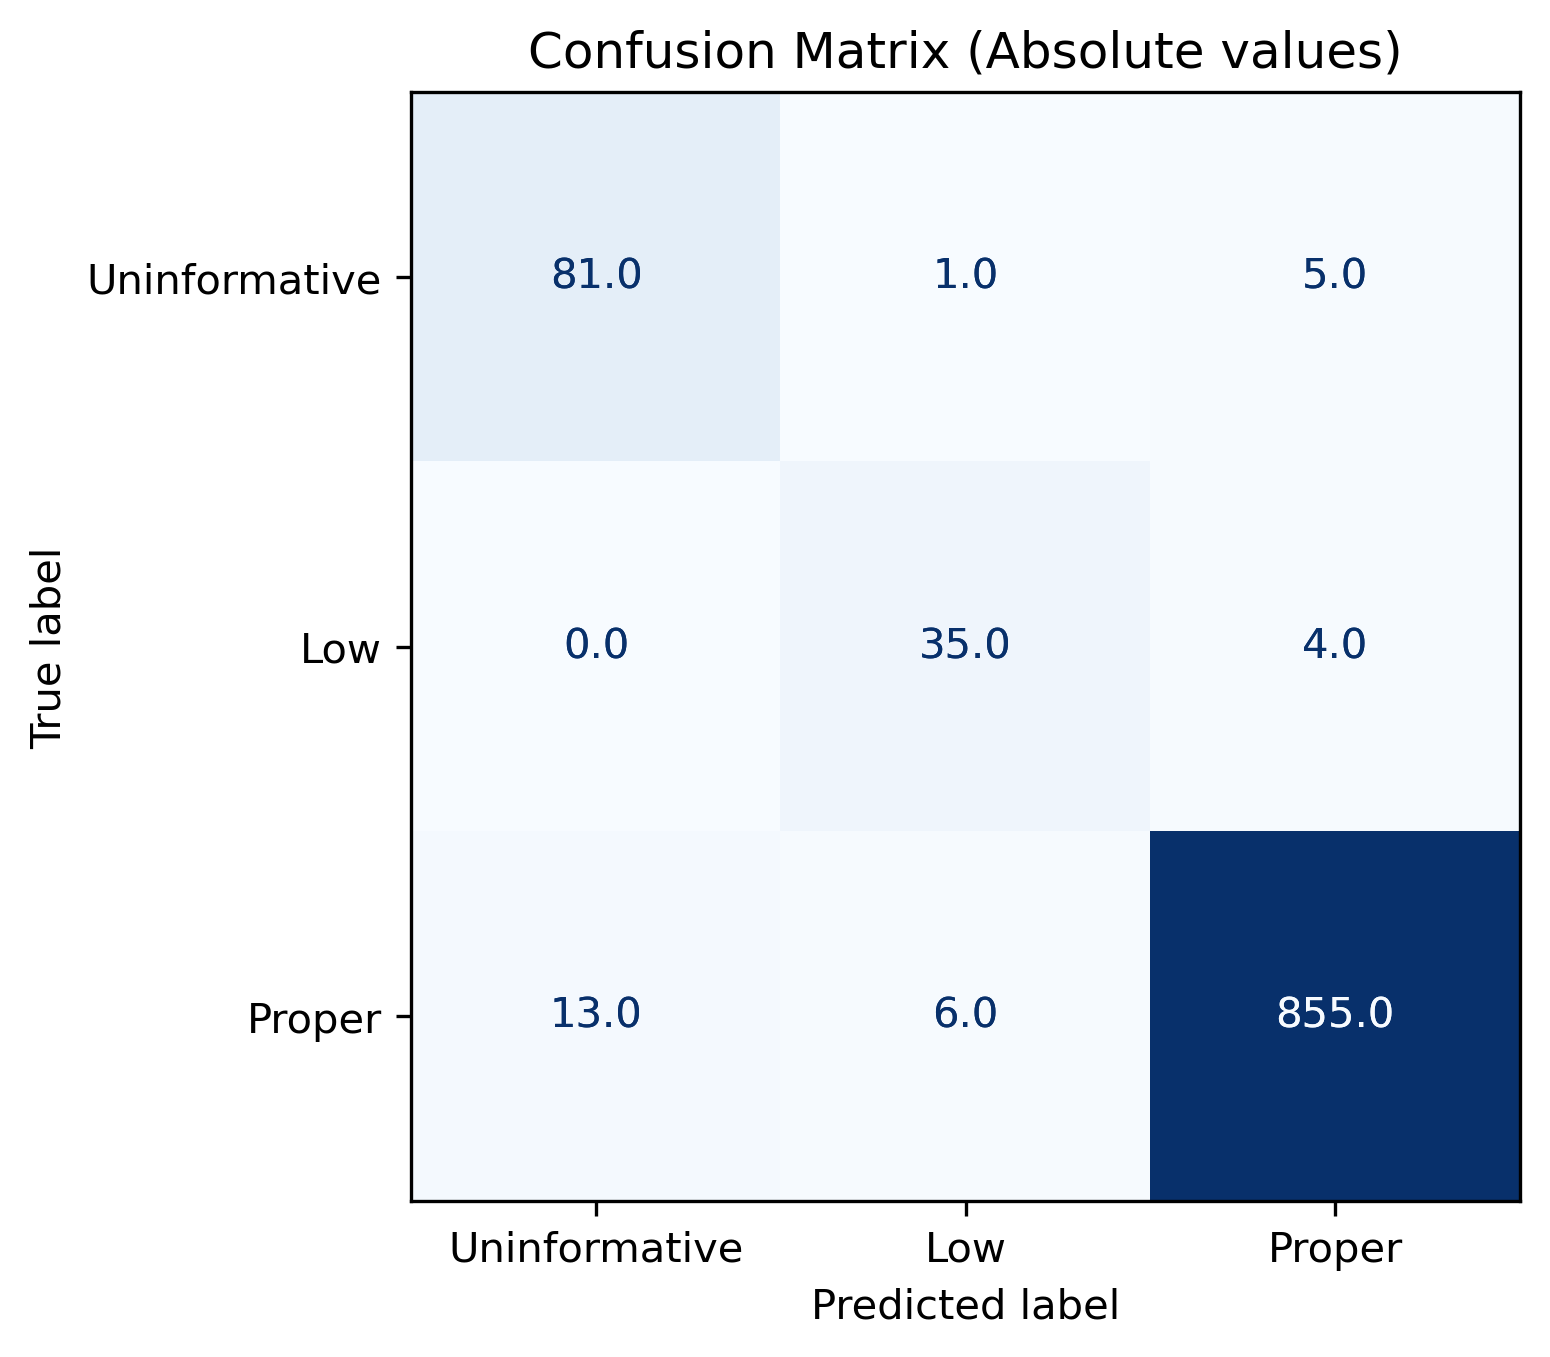
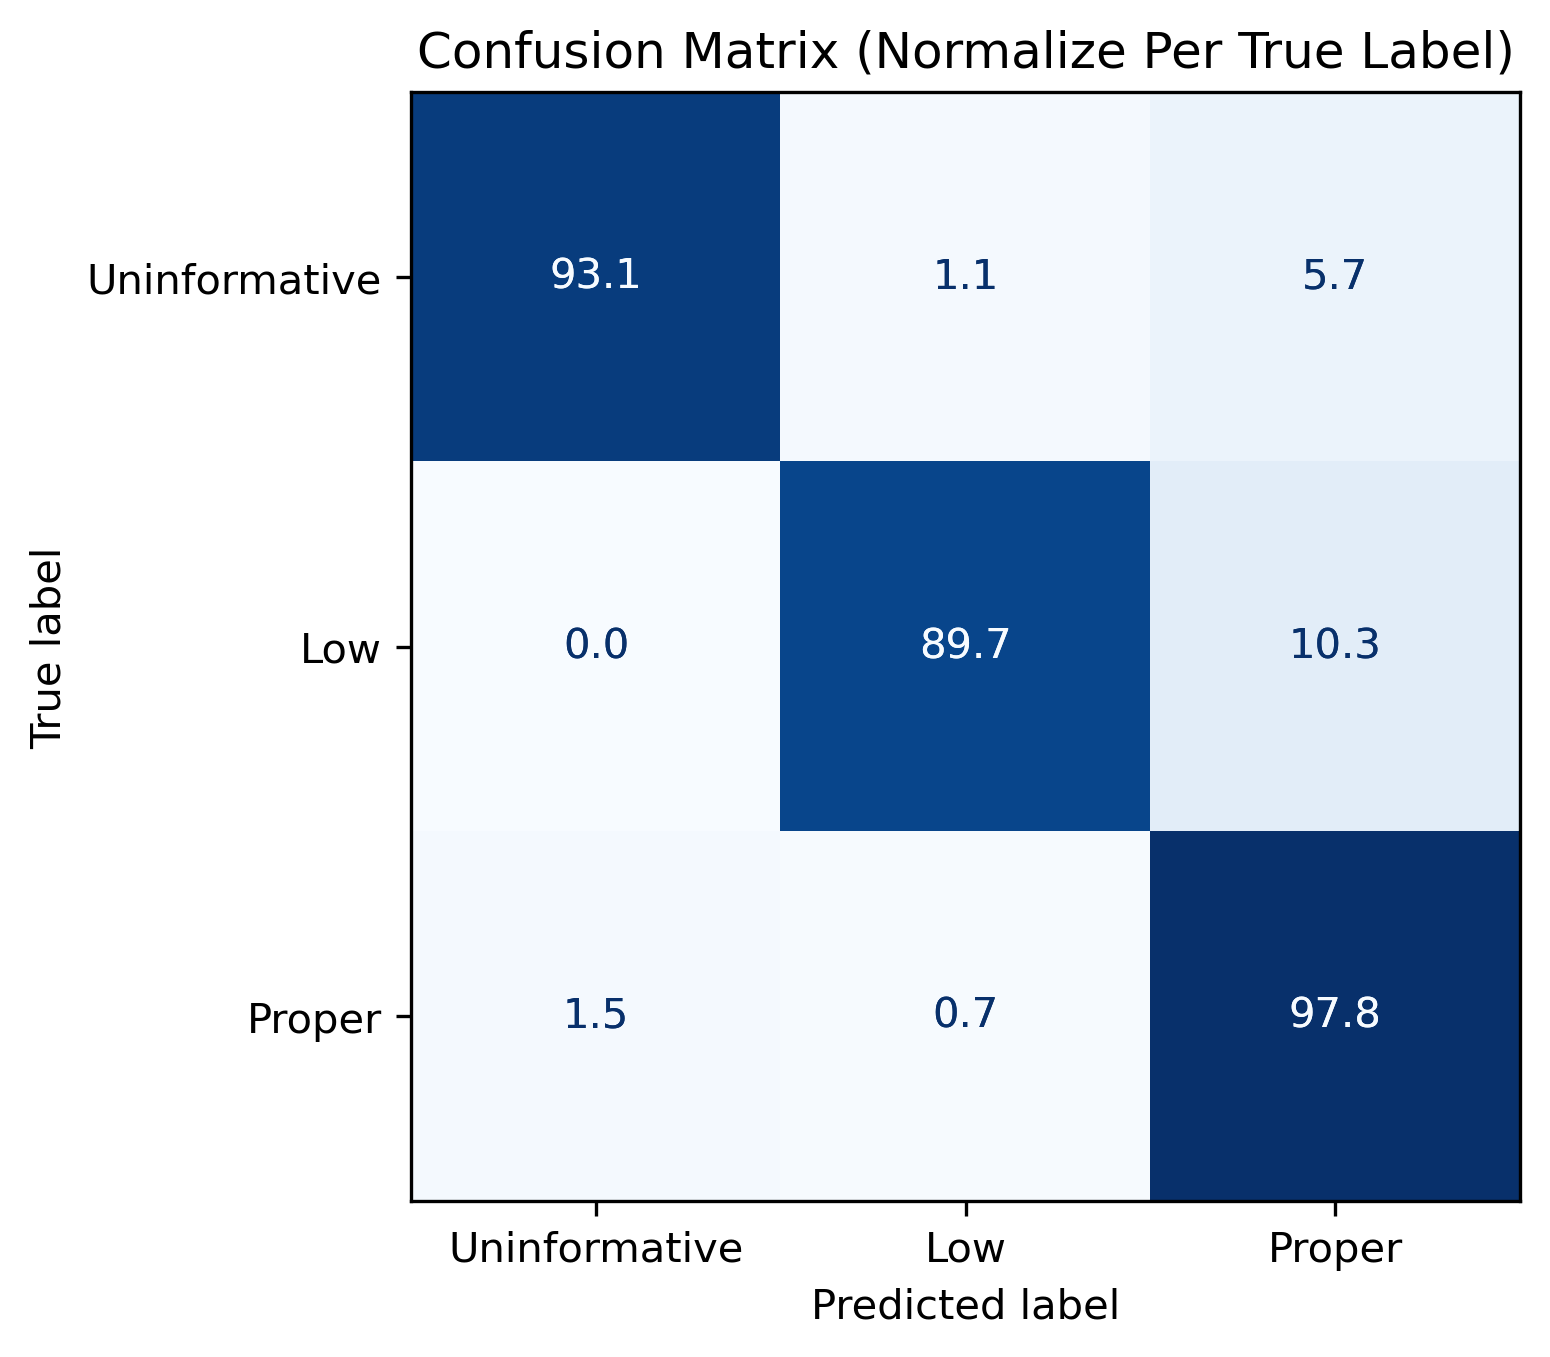

In [5]:
c_report.show_report()


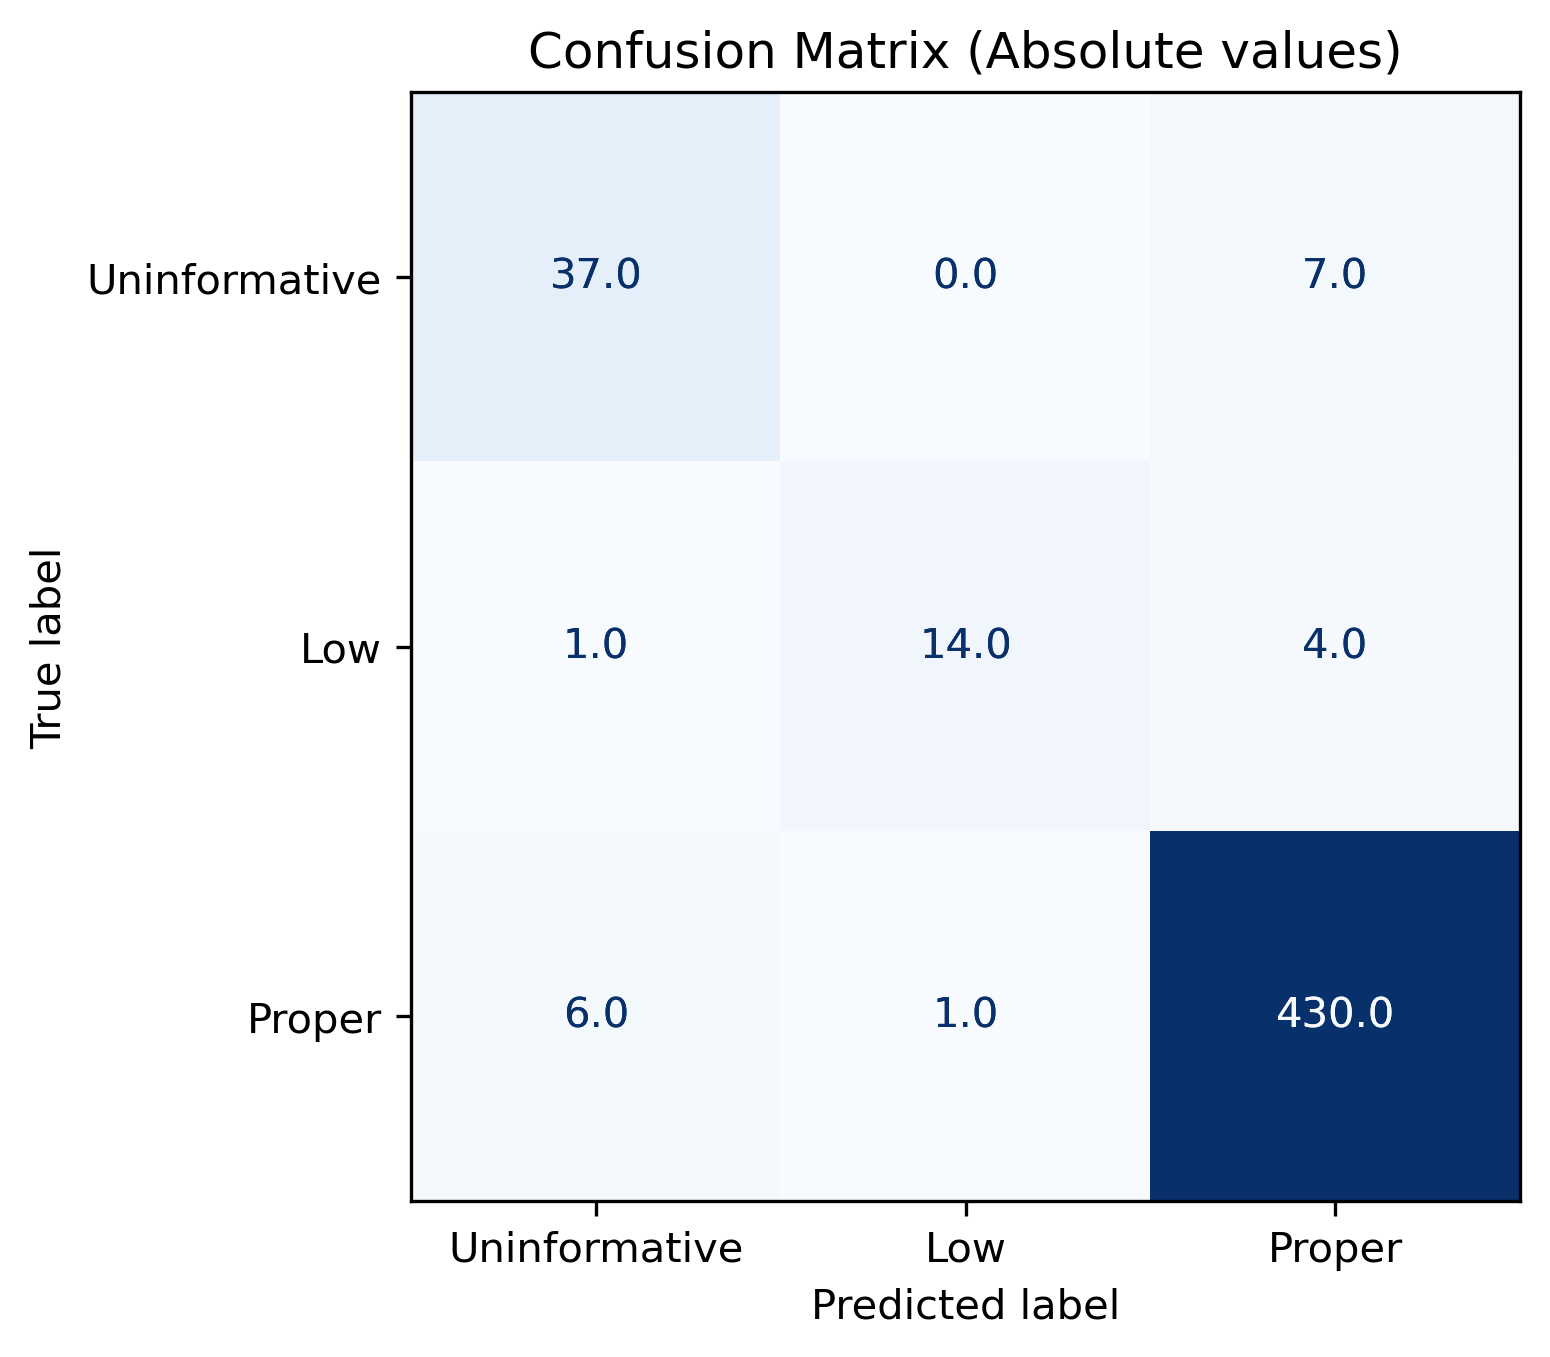
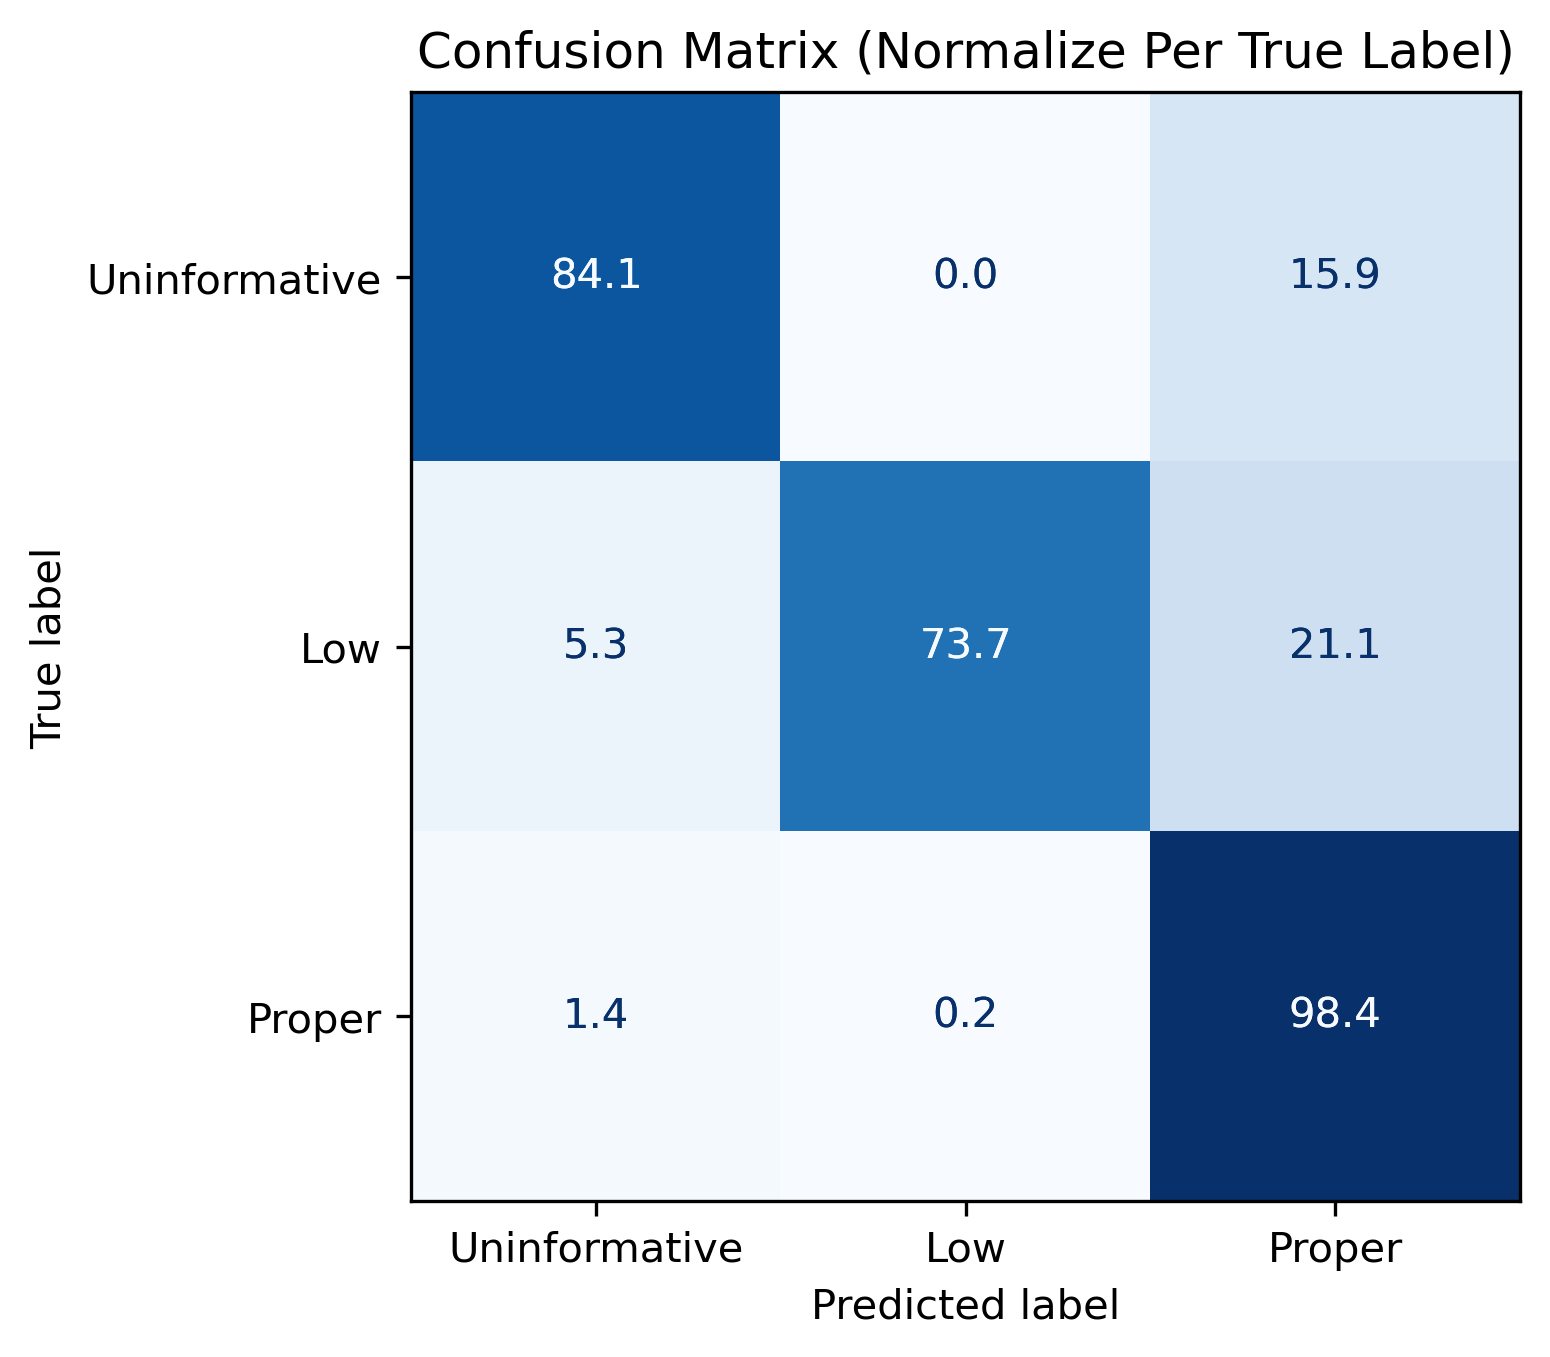

In [6]:
m = ModelEvaluator(embedder_m, dataloader.get_test())
c_report = m.generate_report(include_probablities=True)
c_report.show_report()